!pip install rils_rols

# First Test

In [13]:
import numpy as np

X = np.linspace(-10, 10, 1000)
y = X**2 + 3*X

In [14]:
from rils_rols.utils import R2, RMSE
from rils_rols.rils_rols import RILSROLSRegressor

seed = 42
max_fit_calls = 10000
max_seconds = 10000

rils = RILSROLSRegressor(max_fit_calls=max_fit_calls, max_seconds=max_seconds, random_state = seed, verbose=True)

In [15]:
rils.fit(np.c_[X], y)
report_string = rils.fit_report_string(X, y)

Taking 100 points initially.
1/7. (1.0*x0)
IMPROVED with LS-change impr=True impr2=False 0.9999836782602147  -9.5069901747995+(0.8825857859294*x0)+(0.8825857859294*pow(x0,2.0))
IMPROVED with LS-change impr=True impr2=False 1.0  (1.0*pow(x0,2.0))+(3.0*x0)
perturbation (1.0*x0) produced global improvement.
0/3. t=1.5 R2=1.0000000 RMSE=0.0000000 size=10 fitFails=18/1251 cPerc=42.9 expr=(1.0*pow(x0,2.0))+(3.0*x0)
Round to 8 digits.


In [16]:
rils.model_simp

x0**2 + 3*x0

# Second test

In [92]:
import numpy as np

X = np.linspace(5, 10, 1000)
y = np.sqrt(X) - 2**(X)/8

In [100]:
from rils_rols.utils import R2, RMSE
from rils_rols.rils_rols import RILSROLSRegressor
from rils_rols.rils_rols_ensemble import RILSROLSEnsembleRegressor

seed = 42
max_fit_calls = 100000
max_seconds = 100000

rils = RILSROLSRegressor(max_fit_calls=max_fit_calls, max_seconds=max_seconds, random_state = seed, verbose=True)
rils_e = RILSROLSEnsembleRegressor(max_fit_calls=max_fit_calls, max_seconds=max_seconds, random_state = seed, verbose=True)

In [101]:
rils.fit(np.c_[X], y)
report_string = rils.fit_report_string(X, y)

Taking 100 points initially.
1/7. (1.0+x0)
IMPROVED with LS-change impr=True impr2=False 0.9999934284923855  77.1098139341483+(-9.1271488193705*x0)+(-166.203941525773*pow(x0,-1.0))
perturbation 1.0+x0 produced global improvement.
0/2. t=0.8 R2=0.9999934 RMSE=0.0011434 size=12 fitFails=5/695 cPerc=43.1 expr=77.1098139341483+(-9.1271488193705*x0)+(-166.203941525773*pow(x0,-1.0))
1/53. ((1.0+exp(x0))+pow(x0,-1.0))
IMPROVED with LS-change impr=True impr2=False 0.9999995859834719  3.8951403502952+(-0.773242627598*x0)+(-0.0120754702134*exp(x0))
perturbation 1.0+pow(x0,-1.0)+exp(x0) produced global improvement.
1/4. t=1.8 R2=0.9999996 RMSE=0.0002870 size=11 fitFails=11/1599 cPerc=45.7 expr=3.8951403502952+(-0.773242627598*x0)+(-0.0120754702134*exp(x0))
1/41. ((1.0+x0)+sin(x0))
IMPROVED with LS-change impr=True impr2=False 0.9999995859834719  3.8951403502952+(-0.773242627598*x0)+(-0.0120754702134*exp(x0))
2/41. ((1.0+(x0*x0))+exp(x0))
IMPROVED with LS-change impr=True impr2=False 0.99999958598

In [102]:
model = rils.model_simp
model

1.43794657 - 0.06217181*2.2**x0

In [106]:
import sympy as smp
from sympy.utilities.lambdify import lambdify

x = smp.symbols("x0")

f = lambdify([x], model)

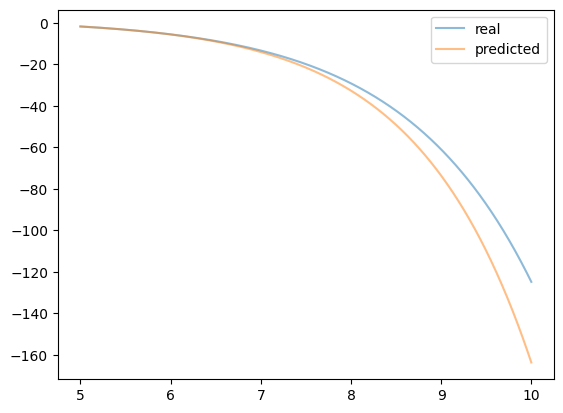

In [107]:
import matplotlib.pyplot as plt

y_pred = f(X)

plt.plot(X, y, alpha=0.5, label="real")
plt.plot(X, y_pred, alpha=0.5, label="predicted")
plt.legend()
plt.show()

# Second Test

In [ ]:
import numpy as np

X = np.linspace(-10, 10)
y = X**2 + 3*X

# Original Example Code

In [ ]:
from pmlb import fetch_data
from sklearn.model_selection import train_test_split
import numpy as np
from rils_rols.utils import R2, RMSE
from rils_rols.rils_rols import RILSROLSRegressor
import sys
import cProfile

PROFILE = False

dataset = 'feynman_I_15_3x'
pmlb_cache = "../pmlb/datasets"
out_path = "tmp.txt"
label="target"
test_size = 0.25
seed = 12345
max_fit_calls = 10000
max_seconds = 10000

input_data = fetch_data(dataset,  local_cache_dir=pmlb_cache)

feature_names = [x for x in input_data.columns.values if x != label]
feature_names = np.array(feature_names)

X = input_data.drop(label, axis=1).values.astype(float)
y = input_data[label].values

assert(X.shape[1] == feature_names.shape[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

rils = RILSROLSRegressor(max_fit_calls=max_fit_calls, max_seconds=max_seconds, random_state = seed, verbose=True)

if PROFILE:
    with cProfile.Profile() as pr:
        rils.fit(X_train, y_train)
    with open('profile_tottime.txt', 'w') as sys.stdout:
        pr.print_stats(1)
    with open('profile_cumtime.txt', 'w') as sys.stdout:
        pr.print_stats(2)
    sys.stdout = sys.__stdout__
    sys.stderr = sys.__stderr__
else:
    rils.fit(X_train, y_train)
report_string = rils.fit_report_string(X_train, y_train)
rils_R2 = ""
rils_RMSE = ""
try:
    yp = rils.predict(X_test)
    rils_R2 = R2(y_test, yp)
    rils_RMSE = RMSE(y_test, yp)
    print("%s\tR2=%.8f\tRMSE=%.8f\texpr=%s"%(dataset, rils_R2, rils_RMSE, rils.model_simp))
except:
    print("ERROR during test.")
with open(out_path, "a") as f:
    f.write("{0}\t{1}\tTestR2={2:.8f}\tTestRMSE={3:.8f}\n".format(dataset, report_string, rils_R2, rils_RMSE))